### 演習18）

この演習では，散乱位相空間(SPS: scattering phase space)でモデルを訓練して，転移学習を利用して格子熱伝導率(LTC: lattice thermal conductivity)の予測モデルを訓練する．

In [1]:
%run common_setting.ipynb

import pandas as pd
import numpy as np
import joblib

#### 訓練データ

この演習に使われる訓練データは，ソースモデルを訓練するSPSデータとターゲットモデルを訓練するLTCデータが必要となる．
まず，用意された`sps_tc.pkl.z`からデータを読み込む．

In [2]:
sps_tc = joblib.load('data/sps_tc.pd.xz')

sps_tc
sps_tc.count()

,TC (W/mK),SPS (cm),composition
mp-28797,NaN,0.000111,"{'Y': 1.0, 'H': 1.0, 'Se': 1.0}"
mp-36248,NaN,0.000152,"{'H': 4.0, 'Br': 1.0, 'N': 1.0}"
mp-34337,NaN,0.000171,"{'H': 4.0, 'N': 1.0, 'Cl': 1.0}"
mp-24012,NaN,0.000187,"{'Ho': 1.0, 'H': 1.0, 'Se': 1.0}"
mp-1541,95.0,0.000194,"{'Be': 1.0, 'Se': 1.0}"
...,...,...,...
mp-614603,NaN,0.004187,"{'Cs': 1.0, 'I': 1.0}"
mp-22875,NaN,0.004233,"{'Tl': 1.0, 'Br': 1.0}"
mp-13548,NaN,0.004822,"{'Cs': 2.0, 'Pt': 1.0}"
mp-571102,NaN,0.004915,"{'Tl': 1.0, 'I': 1.0}"


TC (W/mK)       45
SPS (cm)       320
composition    320
dtype: int64

下記の図で示したように，SPS (ln)とTC (ln)の間に負の相関がある，

<AxesSubplot:xlabel='sps_ln', ylabel='tc_ln'>

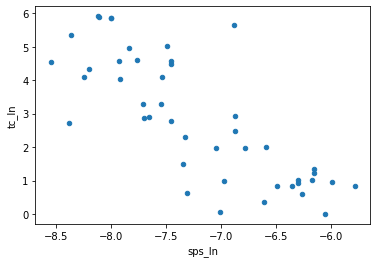

In [3]:
sps_tc = sps_tc.assign(
    sps_ln=np.log(sps_tc['SPS (cm)']),
    tc_ln=np.log(sps_tc['TC (W/mK)']),
)

sps_tc.plot.scatter('sps_ln', 'tc_ln')

#### 組成記述子を計算する

演習12）述べたように，`xenonpy.descriptor.Compositions`を用いて記述子を計算する．

In [4]:
from xenonpy.descriptor import Compositions

compositions = Compositions()
desc = compositions.fit_transform(sps_tc)

記述子に標準化などをかける．

In [5]:
from xenonpy.datatools import Scaler

scaler = Scaler().power_transformer().min_max()
desc_scaled = scaler.fit_transform(desc)

desc_scaled

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-28797,0.519461,0.352939,0.440564,0.475845,0.516967,0.622361,0.354938,0.490035,0.425942,0.418996,...,0.470982,0.000000,0.523867,0.241108,0.000000,0.000000,0.000000,0.282162,0.433662,0.061582
mp-36248,0.191606,0.016526,0.016401,0.453012,0.194561,0.023203,0.431694,0.033376,0.021037,0.021773,...,0.470982,0.000000,0.929314,0.028806,0.000000,0.000000,0.000000,0.282162,0.086047,0.061582
mp-34337,0.103057,0.000000,0.000000,0.420570,0.094037,0.000000,0.430921,0.000000,0.000000,0.000000,...,0.470982,0.000000,0.919461,0.000000,0.000000,0.000000,0.000000,0.282162,0.000000,0.061582
mp-24012,0.648906,0.355647,0.437254,0.462037,0.655626,0.573563,0.352709,0.461868,0.430170,0.426005,...,0.470982,0.000000,0.205548,0.241108,0.000000,0.000000,0.000000,0.282162,0.433662,0.061582
mp-1541,0.428421,0.300812,0.482383,0.167863,0.437169,0.733973,0.544853,0.218400,0.389880,0.456143,...,1.000000,0.398908,0.956637,0.513202,0.378693,0.564028,0.734760,0.196724,0.832094,0.784508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-614603,0.875502,0.902459,0.717115,0.986115,0.865410,0.397809,0.065149,0.893147,0.902493,0.923080,...,0.470982,0.909811,0.430397,0.470528,0.828400,0.724673,0.858743,1.000000,0.635883,0.922868
mp-22875,0.915306,0.598177,0.575577,0.589962,0.911432,0.500198,0.259713,0.287443,0.544243,0.590800,...,1.000000,0.793131,0.066267,0.167639,0.693351,0.594427,0.724846,0.888972,0.298151,0.695821
mp-13548,0.960002,1.000000,0.707796,1.000000,0.952707,0.716052,0.585426,1.000000,1.000000,1.000000,...,0.470982,1.000000,0.087212,0.998361,0.989105,0.890163,0.886134,0.202336,0.635883,0.994553
mp-571102,1.000000,0.573260,0.678202,0.619516,0.994084,0.517409,0.282944,0.332407,0.603099,0.652497,...,1.000000,0.909811,0.066267,0.470528,0.807363,0.724673,0.858743,0.946591,0.298151,0.922868


#### SPSモデルを訓練する

SPSデータは`xenonpy.datatools.Splitter`を用いて訓練データとテストデータに分ける．

In [6]:
from xenonpy.datatools import Splitter

splitter = Splitter(size=desc.shape[0], random_state=0, test_size=0.1)
splitter

Splitter(random_state=0, size=320, test_size=0.1)

In [7]:
x_train, x_test, y_train, y_test = splitter.split(desc_scaled, sps_tc[['sps_ln']])

x_train.shape
y_train.shape
x_test.shape
y_test.shape

(288, 290)

(288, 1)

(32, 290)

(32, 1)

シンプルするために，ここでは４つのNNモデルをランダムで生成し，訓練する．モデル訓練についてもっと詳しく理解する人には，[andom_nn_model_and_training](https://github.com/yoshida-lab/XenonPy/blob/master/samples/random_nn_model_and_training.ipynb)を参考してください．


なお，この演習はCUDAの利用しているが，各自でテストする時に自分のパソコン環境に合して設定してください．

In [8]:
# model parameters

cuda = 'cuda:0'
n_layers = (3, 4, 5)
n_models = 4
epochs = 1000

In [9]:
# import packages

import torch
import torch.optim as optim
import torch.nn as nn
import xenonpy as xe

from datetime import datetime, timedelta
from platform import version as sys_ver
from sys import version as py_ver
from pathlib import Path
from collections import OrderedDict

from torch.utils.data import DataLoader

from xenonpy.datatools import Splitter, preset, Dataset
from xenonpy.utils import ParameterGenerator
from xenonpy.model import SequentialLinear
from xenonpy.model.utils import regression_metrics
from xenonpy.model.training.dataset import ArrayDataset
from xenonpy.model.training import Trainer, Checker, Adam, SGD, MSELoss, ClipNorm, ClipValue, ExponentialLR

from xenonpy.model.training.extension import TensorConverter, Validator, Persist

In [10]:
from xenonpy.utils import ParameterGenerator

generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=lambda n: sorted(np.random.uniform(0.1, 0.6, size=n), reverse=True), 
        repeat=n_layers
    ),
    h_dropouts=0,
    h_activation_funcs=(nn.LeakyReLU(),)
)

In [11]:
def make_name(model):
    name = []
    for n, m in model.named_children():
        if 'layer_' in n:
            name.append(str(m.linear.in_features))
        else:
            name.append(str(m.in_features))
            name.append(str(m.out_features))
    return '-'.join(name)

In [12]:
trainer = Trainer(
    optimizer=Adam(lr=0.01),
    loss_func=MSELoss(),
    cuda=cuda,
    non_blocking=True
)

trainer.extend(
    TensorConverter(empty_cache=True),
    Validator(metrics_func=regression_metrics, early_stopping=50, trace_order=1, pearsonr=1.0, mse=0.0, r2=0.0, mae=0.0),
)  

Trainer(cuda=device(type='cuda', index=0), loss_func=MSELoss(),
        non_blocking=True)

モデルを訓練する

In [13]:
output_dir = 'output/演習18'
Path(output_dir).mkdir(parents=True, exist_ok=True)  # フォルダを作る

summary = []
predicitons = []


for i, (paras, model) in enumerate(generator(n_models, factory=SequentialLinear)):
    train_dataset = DataLoader(ArrayDataset(x_train, y_train), shuffle=True, batch_size=50)  # データ数はかなり少ないため，mini batchをしないように
    val_dataset = DataLoader(ArrayDataset(x_test, y_test), batch_size=1000) 

    model_name = make_name(model)
    persist = Persist(
        f'{output_dir}/models/{model_name}', 
        # -^- required -^-

        # -v- optional -v-
        increment=False, 
        sync_training_step=True,
        model_class=SequentialLinear,
        model_params=paras,
    )
    _ = trainer.extend(persist)
    trainer.reset(to=model)

    ## init training env
    training_env = {
        "start": datetime.utcnow().strftime('%Y/%m/%d %H:%M:%S.%f')[:-7],
        "finish": "",
        "device": cuda,
        "python": py_ver.splitlines()[0][:-1],
        "system": sys_ver(),
        "pandas": pd.__version__,
        "numpy": np.__version__,
        "pytorch": torch.__version__,
        "xenonpy": xe.__version__,
    }

    ## training
    trainer.fit(training_dataset=train_dataset, validation_dataset=val_dataset, epochs=epochs)

    ## update finish time
    training_env['finish'] = datetime.utcnow().strftime('%Y/%m/%d %H:%M:%S.%f')[:-7]

    ## save additional info
    persist(training_indices=x_train.index.tolist(), validation_indices=x_test.index.tolist(), training_env=training_env)  # <-- calling of this method only after the model training
    training_info = trainer.training_info

    y_pred, y_true = trainer.predict(dataset=val_dataset, checkpoint='mae')
    y_fit_pred, y_fit_true = trainer.predict(dataset=train_dataset, checkpoint='mae')
    
    ## prediction
    tmp = pd.DataFrame(data=dict(
        Prediction=np.vstack((y_pred, y_fit_pred)).flatten(),
        Observation=np.vstack((y_true, y_fit_true)).flatten(),
        for_test=[True] * y_test.size + [False] * y_train.size
    )).assign(model_id=i)
    
    predicitons.append(tmp)
    tmp = pd.concat(predicitons)
    tmp.to_pickle(f'{output_dir}/models/predicitons.pd.xz')
    tmp.to_csv(f'{output_dir}/models/predicitons.csv')
    
    ## training information
    summary.append(OrderedDict(
        id=model_name,
        property='SPS (cm, ln)',
        mae=training_info['val_mae'].min(),
        mse=training_info['val_mse'].min(),
        r2=training_info['val_r2'].max(),
        corr=training_info['val_pearsonr'].max(),
        training_env=training_env
    ))

    tmp = pd.DataFrame(summary)
    tmp.to_pickle(f'{output_dir}/models/training_summary.pd.xz')
    tmp.to_csv(f'{output_dir}/models/training_summary.csv')
    
predicitons = pd.concat(predicitons)
summary = pd.DataFrame(summary)
summary

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 315


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 203


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 277


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 157


,id,property,mae,mse,r2,corr,training_env
0,290-165-101-80-44-1,"SPS (cm, ln)",0.207578,0.072681,0.846165,0.931040,"{'start': '2022/06/11 11:09:18', 'finish': '20..."
1,290-145-95-93-84-53-1,"SPS (cm, ln)",0.266343,0.115927,0.754629,0.877055,"{'start': '2022/06/11 11:09:25', 'finish': '20..."
2,290-162-126-111-103-1,"SPS (cm, ln)",0.225485,0.092120,0.805019,0.912112,"{'start': '2022/06/11 11:09:31', 'finish': '20..."
3,290-172-117-41-38-35-1,"SPS (cm, ln)",0.240496,0.104744,0.778301,0.902715,"{'start': '2022/06/11 11:09:37', 'finish': '20..."


見てわかるように，４つのモデルに異なる隠れ層を持っている（上記テーブルの`id`欄は隠れ層のニューロン数を表している）が，性能はほぼ一緒．

転移学習を行う前に，モデルの訓練状況と予測性能を可視化してみましょう．

1. 訓練情報

`Trainer`がもつ`training_info`に訓練中のstepごとの情報が保存されています，

,total_iters,i_epoch,i_batch,train_mse_loss,val_mae,val_mse,val_rmse,val_r2,val_pearsonr,val_spearmanr,val_p_value,val_max_ae
154,154,26,5,0.117660,0.295053,0.123014,0.350733,0.739630,0.874217,0.817449,6.319111e-11,0.786178
155,155,26,6,0.103270,0.295975,0.125486,0.354240,0.734398,0.875017,0.835777,5.774483e-11,0.807491
156,156,27,1,0.050165,0.295226,0.132908,0.364566,0.718688,0.870310,0.837610,9.730151e-11,0.832828


<AxesSubplot:>

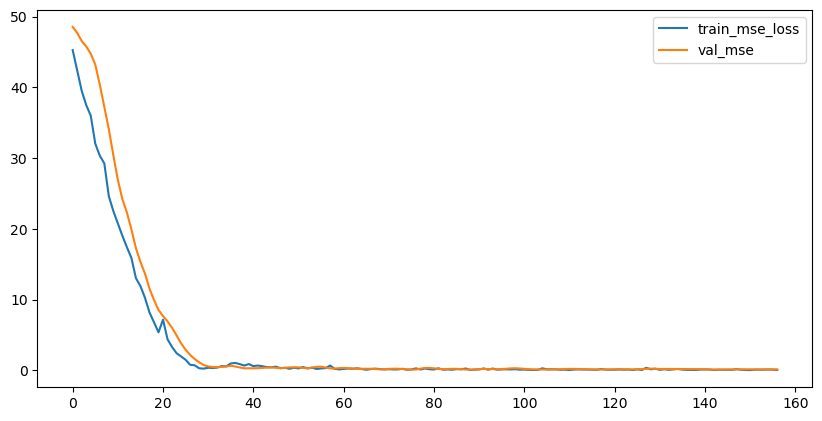

In [14]:
_, ax = plt.subplots(figsize=(10, 5), dpi=100)
trainer.training_info.tail(3)
trainer.training_info.plot(y=['train_mse_loss', 'val_mse'], ax=ax)

2. 予測値vs観測値

<AxesSubplot:xlabel='Prediction', ylabel='Observation'>

<AxesSubplot:xlabel='Prediction', ylabel='Observation'>

<AxesSubplot:xlabel='Prediction', ylabel='Observation'>

<AxesSubplot:xlabel='Prediction', ylabel='Observation'>

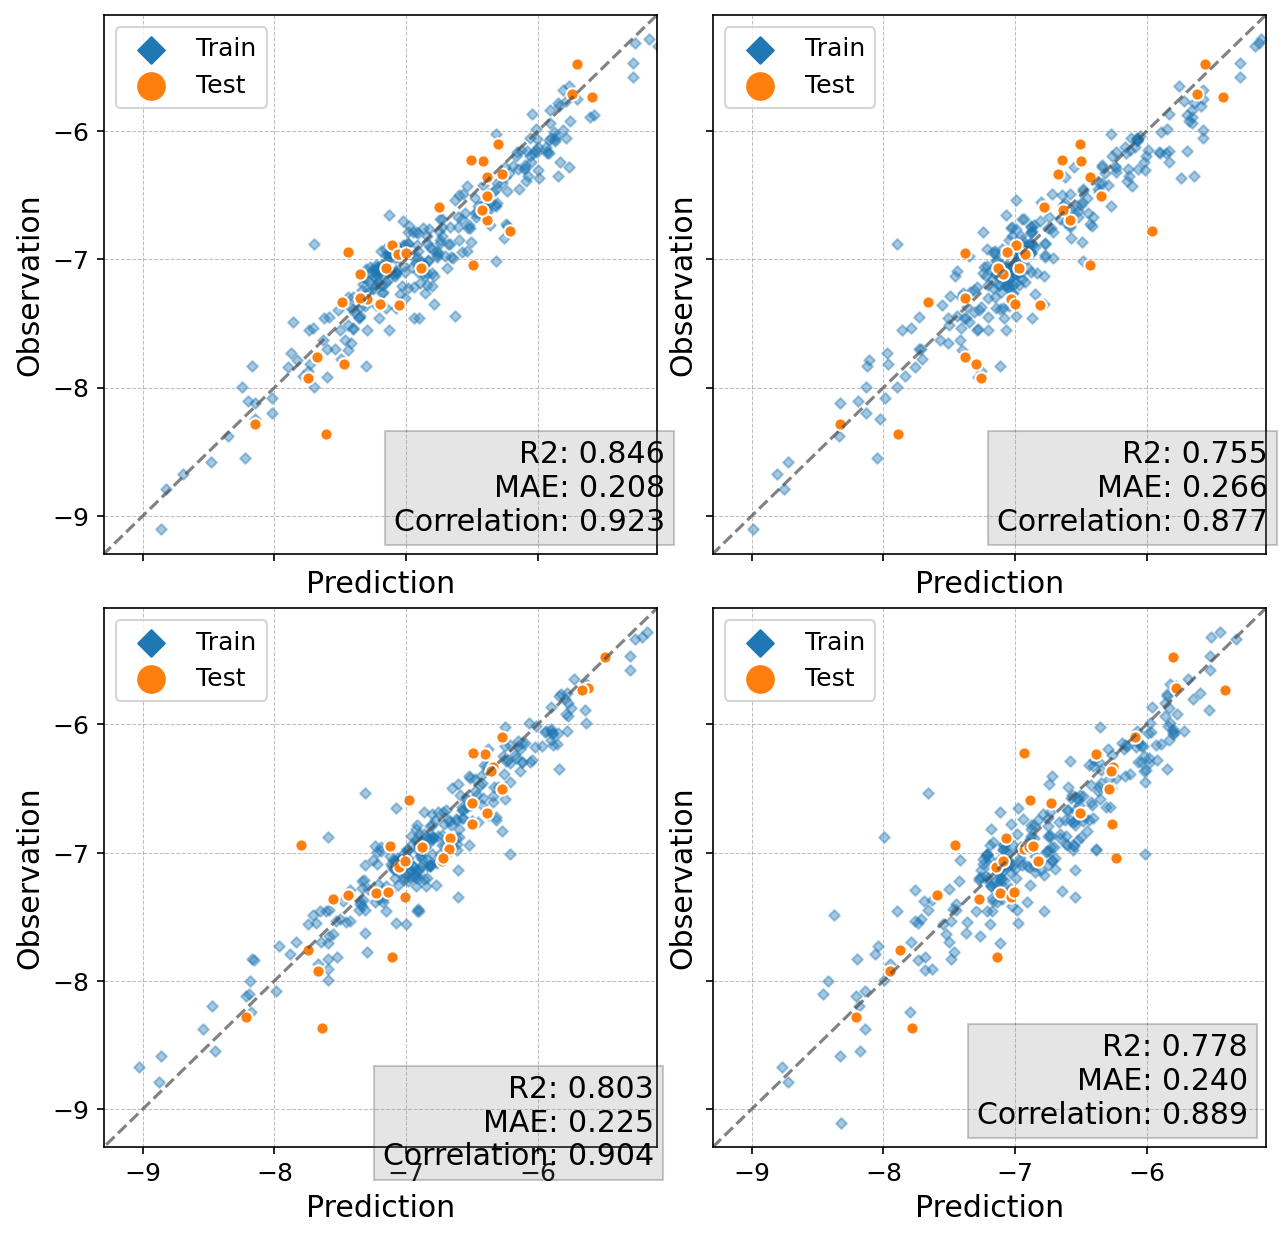

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=150, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for ax, (_, data) in zip(axs.flatten(), predicitons.groupby('model_id')):
    tmp = data[data.for_test]
    y_pred, y_true = tmp.Prediction.values, tmp.Observation.values

    tmp = data[~data.for_test]
    y_fit_pred, y_fit_true = tmp.Prediction.values, tmp.Observation.values

    cv_plot(y_pred, y_true, y_fit_pred, y_fit_true, ax=ax)

#### 転移学習

##### 隠れ層の抽出 (frozen feature)

`xenonpy.descriptor.FrozenFeaturizer`は`SequentialLinear`で構成したNNモデルから隠れ層の抽出ができる．

これから，`mae`最小のモデルを用いて，最後の隠れ層を使ってTCのランダムフォレストモデルを訓練する．

In [16]:
best_model_name = summary.sort_values('mae').head(1).id.item()
trainer = Trainer.from_checker(f'{output_dir}/models/{best_model_name}')
trainer.reset(to='mae')

best_model = trainer.model
best_model

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=165, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (normalizer): BatchNorm1d(165, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=165, out_features=101, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (normalizer): BatchNorm1d(101, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=101, out_features=80, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (normalizer): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=80, out_features=44, bias=True)
    (dropout): Dropout(p=0, i

In [17]:
# --- import necessary libraries

from xenonpy.descriptor import FrozenFeaturizer

# --- init FrozenFeaturizer with NN model
ff = FrozenFeaturizer(model=best_model)
ff

FrozenFeaturizer(model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=165, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (normalizer): BatchNorm1d(165, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=165, out_fe...
    (normalizer): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=80, out_features=44, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (normalizer): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (output): Linear(in_features=44, out_features=1, bias=True)
))

The following code will generate new "neural descriptors" from the corresponding neural network model.

In [18]:
tmp = sps_tc.dropna()

neural_descriptors = ff.transform(desc_scaled.loc[tmp.index], depth=1 ,return_type='df')
neural_descriptors.head(3)

,L(-1)_1,L(-1)_2,L(-1)_3,L(-1)_4,L(-1)_5,L(-1)_6,L(-1)_7,L(-1)_8,L(-1)_9,L(-1)_10,...,L(-1)_35,L(-1)_36,L(-1)_37,L(-1)_38,L(-1)_39,L(-1)_40,L(-1)_41,L(-1)_42,L(-1)_43,L(-1)_44
mp-1541,-1.907755,-0.338633,-1.785163,-2.293624,-0.478348,-5.193748,-4.578907,0.717293,-3.497502,-0.232644,...,0.441963,0.192911,0.615777,2.380728,-0.594986,-5.265559,-1.780512,-5.498725,-5.533217,-1.169519
mp-23703,-2.001713,-1.616199,-1.941876,-2.433508,-0.080378,-2.234909,-2.128248,-1.272372,-0.988290,-0.359971,...,0.728054,0.435754,-2.783784,1.180742,-0.886707,-3.484913,-2.920038,-2.258926,-2.939060,0.161286
mp-830,-1.388499,-1.325873,-2.292206,-3.881752,-0.842440,-3.901524,-3.165725,-0.392836,-1.328989,-0.665230,...,0.628708,1.020572,-2.225612,2.824039,-1.673200,-3.704171,-3.265968,-3.334146,-3.441006,0.175728


In [19]:
# split data
from xenonpy.datatools import Splitter

y = tmp['tc_ln']
splitter = Splitter(len(y), test_size=0.2)

X_train, X_test, y_train, y_test = splitter.split(neural_descriptors, y.values)

In [20]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_fit_pred = rf.predict(X_train)

RandomForestRegressor()

<AxesSubplot:title={'center':'LTC (W/mk)'}, xlabel='Prediction', ylabel='Observation'>

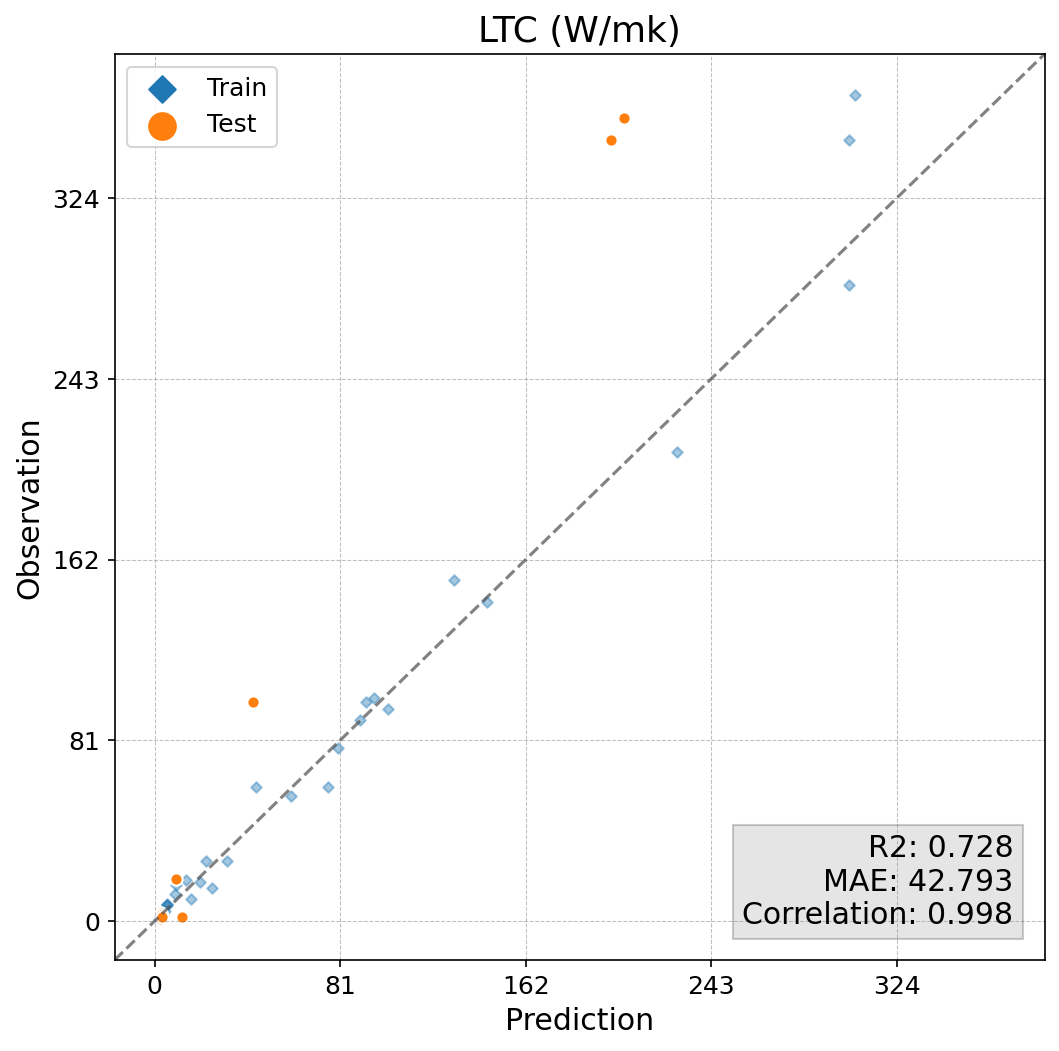

In [23]:
cv_plot(np.exp(y_pred), np.exp(y_test), np.exp(y_fit_pred), np.exp(y_train), title='LTC (W/mk)')